# 미세 튜닝 모델 검증

In [1]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

In [2]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [3]:
print(device)

cuda


# Text2Image

In [7]:
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel

model_path = "/Jupyter/models/sd-foodai-model-rxt4090"
unet = UNet2DConditionModel.from_pretrained(model_path + "/checkpoint-28000/unet", torch_dtype=torch.bfloat16)

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", unet=unet, torch_dtype=torch.bfloat16)
pipe.to(device)

# image = pipe(prompt="yoda").images[0]
# image.save("yoda-naruto.png")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
# Load the pipeline
model_id_or_path = "CompVis/stable-diffusion-v1-4"
original_pipe = StableDiffusionPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.bfloat16).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
# prompt = "Seafood hot pot, as if it's being served in a Korean restaurant"
# prompt = "Pajeon (green onion pancake), Korean style"
# prompt = "Songpyeon (half-moon shaped rice cake), Korean style, photographed from directly above"
# prompt = 'Small clams, steamed, photographed from directly above'
# prompt = "Roasted seaweed, Korean style, photographed from directly above"
# prompt = 'Tteokbokki (spicy rice cakes), which is Korean street food, photographed from directly above'
# prompt = "Ramyeon (Korean instant noodles), photographed from directly above"
# prompt = "Kimchi soup, photographed from directly above"
prompt = "Naengmyeon (cold noodles), photographed from directly above"
# prompt = "Korean favoriate food called 'Chicken feet', photographed from directly above"
# 
# prompt = "Spicy pork bulgogi, a food which is photographed from directly above"

  0%|          | 0/35 [00:00<?, ?it/s]

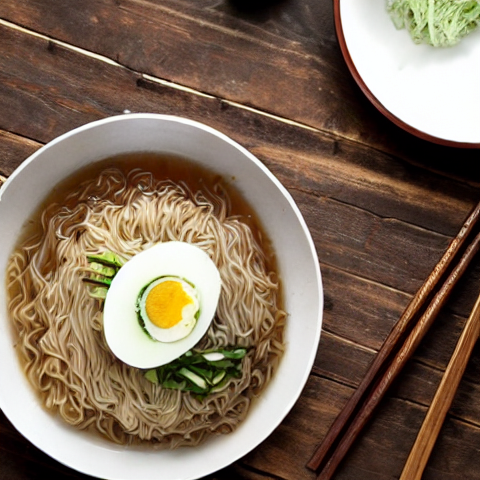

In [10]:
generator = torch.Generator(device=device).manual_seed(42)
pipe(prompt=prompt,
    # negative_prompt="chinese food", # Negative prompt to avoid
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

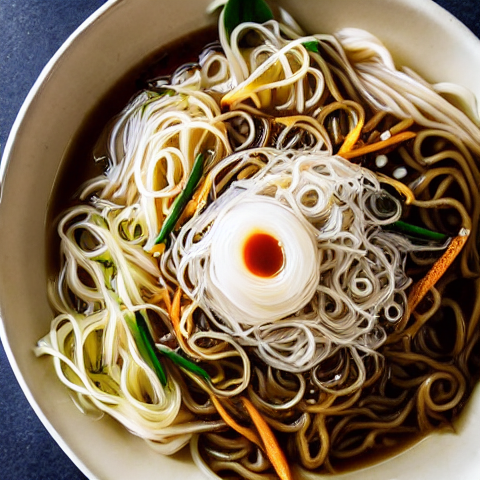

In [11]:
generator = torch.Generator(device=device).manual_seed(42)
original_pipe(prompt=prompt, 
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

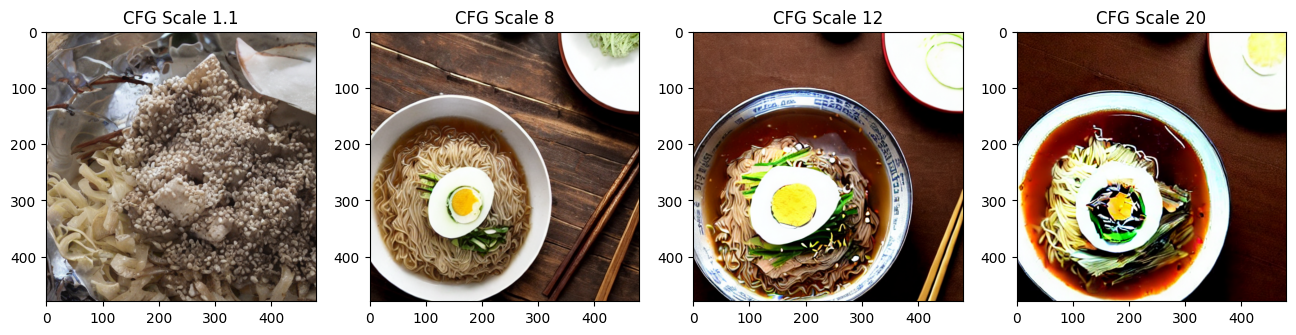

In [12]:
#@markdown comparing guidance scales:
cfg_scales = [1.1, 8, 12, 20] #@param
# prompt = "A collie with a pink hat" #@param
fig, axs = plt.subplots(1, len(cfg_scales), figsize=(16, 5))
for i, ax in enumerate(axs):
  im = pipe(prompt, height=480, width=480,
    guidance_scale=cfg_scales[i], num_inference_steps=35,
    generator=torch.Generator(device=device).manual_seed(42)).images[0]
  ax.imshow(im); ax.set_title(f'CFG Scale {cfg_scales[i]}');

# 조사: 한국어 스테이블 디퓨전

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

repo = "Bingsu/my-korean-stable-diffusion-v1-5"
euler_ancestral_scheduler = EulerAncestralDiscreteScheduler.from_config(repo, subfolder="scheduler")
ko_pipe = StableDiffusionPipeline.from_pretrained(
    repo, scheduler=euler_ancestral_scheduler, torch_dtype=torch.float16,
)
ko_pipe.to(device)

In [ ]:
generator = torch.Generator(device=device).manual_seed(42)
ko_pipe(prompt="고양이 한마리",
    # negative_prompt="chinese food", # Negative prompt to avoid
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]